# Data scraping and analysis of the recent trending status of the fast food chain Tropical Hut

snscraper has a very easy to use python wrapper than can be used to scrape tweets from a public Twitter account.

In [1]:
from tqdm import tqdm
import snscrape.modules.twitter as sntwitter
import pandas as pd
from datetime import date, timedelta
from scrape_utils import scrape_twitter

import seaborn as sns
import matplotlib.pyplot as plt

## Scraping twitter data

In [2]:
scrape_twitter(query="tropical hut", since="2022-01-01")

tropical hut since:2022-01-01 until:2022-06-21 


8250it [11:58, 11.48it/s]


## Exploration of the data and cleaning

In [59]:
df = pd.read_csv("tweets_tropical hut.csv")
df.sample(5)

,tweet_id,date,tweet,retweets,likes,quote_tweets,replies,retweeted_tweet,quoted_tweet,user_name,user_display_name,user_description,user_verified,user_location,user_created,user_followers,user_following,user_tweets_count
7096,1536133403786940416,2022-06-12 23:48:38+00:00,@3stanJake Last time i checked buhay pa tropic...,0,1,0,0,NaN,NaN,tamboy_,twitch.tv/tamboyadvance,Small circle. Private Life. Peace of mind. Cat...,False,Evergaol,2021-11-15 04:47:06+00:00,165,317,3143
3886,1537196336302673921,2022-06-15 22:12:20+00:00,@iamaivanreigh @aye_ramalla #TropicalHut mukb...,0,0,0,0,NaN,NaN,FajMarlon,Marlon Faj,Palaban para sa Katotohanan,False,riyadh saudi arabia,2017-05-03 17:43:17+00:00,50,205,2427
6405,1536297083174801408,2022-06-13 10:39:02+00:00,ME REALISING THREE OF TROPICAL HUT BRANCHES I ...,0,5,0,1,NaN,https://twitter.com/MrlnSngco/status/153595597...,stormberry,anne 🏴‍☠️🖤,«♄» death reborn revolution. #neveragain ...,False,NaN,2007-05-09 07:45:08+00:00,1092,391,233192
4216,1537089715048189953,2022-06-15 15:08:40+00:00,Tropical hut Q-Plaza din andami tao https://t....,0,0,0,0,NaN,https://twitter.com/whuaffee/status/1536960152...,RealMarinela,Marinela | Proud KAKAMPINK!,"Still a Kakampink, Always a KAKAMPINK! VIP - J...",False,"Taytay, Rizal",2010-08-28 15:10:24+00:00,752,1203,21977
947,1538047922293551104,2022-06-18 06:36:14+00:00,I love Tropical Hut! Ito yung palagi kong orde...,4,52,1,1,NaN,NaN,ernstunspoken,Ernest Joric 🧑🏻‍💻,Filipino 🇵🇭 | Marikeño/Novo Ecijano | Frustrat...,False,Republic of the Philippines,2009-05-14 11:43:37+00:00,133,32,3468


In [60]:
# Convert the date column into datetime64 format and adjust for Manila's timezone
df['date']=pd.to_datetime(df['date'], yearfirst=True).dt.tz_convert('Asia/Manila')
df['user_created']=pd.to_datetime(df['user_created'], yearfirst=True).dt.tz_convert('Asia/Manila')
df.dtypes

tweet_id                                   int64
date                 datetime64[ns, Asia/Manila]
tweet                                     object
retweets                                   int64
likes                                      int64
quote_tweets                               int64
replies                                    int64
retweeted_tweet                          float64
quoted_tweet                              object
user_name                                 object
user_display_name                         object
user_description                          object
user_verified                               bool
user_location                             object
user_created         datetime64[ns, Asia/Manila]
user_followers                             int64
user_following                             int64
user_tweets_count                          int64
dtype: object

In [61]:
# Set tweet to lower case for cleaning
df['tweet_lc'] = df['tweet'].str.lower()

In [62]:
# Look for tweets from their official account and different variations of tropical hut. tropical.hut <- wildcard in regex
searchfor = ['tropical hut', 'tropicalhut', 'tropical.hut']
df_clean = df[(df.tweet_lc.str.contains('|'.join(searchfor))) | (df.user_name == 'THHamburger')]
df_x = df[~df.tweet_id.isin(df_clean.tweet_id.to_list())]

In [63]:
# Statistical analysis of the data
df_clean.describe()

,tweet_id,retweets,likes,quote_tweets,replies,retweeted_tweet,user_followers,user_following,user_tweets_count
count,8.004000e+03,8004.000000,8004.000000,8004.000000,8004.000000,0.0,8.004000e+03,8004.000000,8004.000000
mean,1.535434e+18,3.184908,37.122939,1.683783,0.831709,NaN,2.724195e+03,690.960145,28257.169665
std,8.062387e+15,64.775785,717.146882,50.855764,8.311732,NaN,9.631576e+04,1099.443757,47623.815803
min,1.477580e+18,0.000000,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000,1.000000
25%,1.536407e+18,0.000000,0.000000,0.000000,0.000000,NaN,1.180000e+02,194.000000,4040.750000
50%,1.537137e+18,0.000000,1.000000,0.000000,0.000000,NaN,3.205000e+02,400.000000,13593.500000
75%,1.537712e+18,0.000000,2.000000,0.000000,1.000000,NaN,8.120000e+02,781.000000,33867.250000
max,1.538691e+18,3574.000000,36095.000000,3613.000000,532.000000,NaN,8.512173e+06,33678.000000,984166.000000


## Trend history

We scraped tweets from Jan 01, 2022 to Jun 19, 2022. We can see that the trend started  on Jun 12, 2022 and peaked on Jun 16. Interestingly, there is a small peak during March.

<AxesSubplot:xlabel='date', ylabel='tweet_id'>

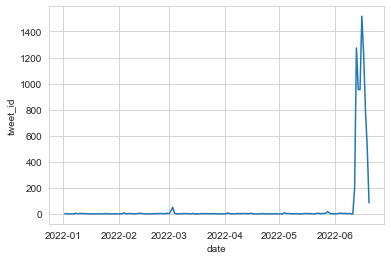

In [66]:
sns.set_style("whitegrid")
df_count = df_clean['tweet_id'].groupby(by=df_clean['date'].dt.date).count().sort_values(ascending=False)
sns.lineplot(data=df_count)

In [67]:
df_count.sort_values(ascending=False).head(10)

date
2022-06-16    1517
2022-06-13    1274
2022-06-17    1231
2022-06-14     955
2022-06-15     954
2022-06-18     801
2022-06-19     509
2022-06-12     203
2022-06-20      86
2022-03-03      51
Name: tweet_id, dtype: int64

## Top Tweets
Below we filtered the data to include only tweets that were posted on June 12, 2022. We then sorted by likes, and we can see the originating tweet of the trend

In [68]:
df_jun12 = df_clean[['tweet', 'user_name', 'likes', 'retweets']][(df_clean.date > '2022-06-12') & (df_clean.date < '2022-06-13')].sort_values('likes', ascending=False)
df_jun12.head(10)

,tweet,user_name,likes,retweets
7556,"Tropical Hut in Escolta, ako lang ang customer...",dumidyeypee,34646,3574
7555,I remember eating out with my family in Tropic...,dumidyeypee,1691,47
7532,@dumidyeypee May Tropical Hut sa Makati. My of...,lanaroadzz,1265,34
7426,Tropical Hut if you don't mind is owned by Mer...,Shirley47569882,867,75
7392,Not gonna lie. I'm surprise Tropical Hut is tr...,SepiaMetanoia,462,59
7455,How Tropical Hut serves so much affordable and...,__Miggyyy,391,43
7523,@dumidyeypee Nakakalungkot ang ambience sa Tro...,_stephsun,389,14
7547,@dumidyeypee who owns tropical hut? kailangan ...,krephel1218,377,1
7521,@dumidyeypee Underated fastfood sa generation ...,LadyVodka10,317,10
7513,@_thepaulorubio @MrlnSngco @krephel1218 @dumid...,_picassomnlpex,307,5


In [69]:
for i in range(10):
    print(f'{df_jun12.iloc[i].user_name}\t{df_jun12.iloc[i].tweet}')

dumidyeypee	Tropical Hut in Escolta, ako lang ang customer nila. https://t.co/Wl8VcuWT6c
dumidyeypee	I remember eating out with my family in Tropical Hut along Baymart Plaza in Lower Bicutan. Really competing sila with the likes of Jollibee and Chowking (hindi pa binili ni Jollibee era).
lanaroadzz	@dumidyeypee May Tropical Hut sa Makati. My officemates and I order breakfast. Masarap na, sulit pa! Ham and mushroom omelette, garlic rice or toasted bread, brewed coffee and pineapple juice for 99pesos lang!
Shirley47569882	Tropical Hut if you don't mind is owned by Mercury Drugstore from Que Family 🙂kaya food ay Healthy na nakakabusog!
SepiaMetanoia	Not gonna lie. I'm surprise Tropical Hut is trending right now in the Philippines.

Glad most Filipinos are fondly remember this restaurant. And this come from someone who rarely eats here for year. #TropicalHut https://t.co/PLWQ14BBTn
__Miggyyy	How Tropical Hut serves so much affordable and better quality food than mainstream fastfood chains 

Below we focused on Jun 19. The peak of the trend. The 3rd and 4th highest likes here appear to be from their social media account.

In [70]:
df_jun16 = df_clean[['tweet', 'user_name', 'likes', 'retweets']][(df_clean.date > '2022-06-16') & (df_clean.date < '2022-06-17')].sort_values('likes', ascending=False)
df_jun16.head(10)

,tweet,user_name,likes,retweets
3469,We jumped into the trend! \nOrdered a lot from...,MINlRM,24805,1651
2930,Tropical Hut getting increased sales is why I ...,prodeeboy,5119,586
3044,#TropicalHut #THHamburger #SarapNaBabalikbalik...,THHamburger,3506,613
3048,"@dumidyeypee Maraming salamat, Tropical Hut lo...",THHamburger,1408,111
3262,Update: Saw this Tropical Hut ad from my lolo'...,LiaSanMateo,551,50
3577,"Again, try tropical hut. Sabi ng mga staff dit...",yeol_mistress,441,46
3298,Kahapon ko pa nababasa ang tweets tungkol sa T...,DocHappy95,417,16
3012,GUYS!!! MAY BAGONG TWITTER NA RAW ANG TROPICAL...,MINlRM,317,28
3309,Nakapag-Tropical Hut na ba ang lahat https://t...,SofiaMonica_,128,2
2847,Tropical Hut for tonight's dinner 🍍🍍\nSobrang ...,jmyosures,101,3


In [72]:
for i in range(10):
    print(f'{df_jun16.iloc[i].user_name}\t{df_jun16.iloc[i].tweet}')

MINlRM	We jumped into the trend! 
Ordered a lot from Tropical Hut.
I grew up with TH because of my aunts where they work and they always tream me there.

I ordered the BB - Big shot breakfast, for only 190 (?) Rice, ham, mushroom &amp; cheese omelette, chicken lumpia &amp; burger steak! https://t.co/SHWTbruviR
prodeeboy	Tropical Hut getting increased sales is why I believe Twitter is a different kind of echo chamber. It has the capacity to affect the real world.
THHamburger	#TropicalHut #THHamburger #SarapNaBabalikbalikan https://t.co/S02aGAVVYc
THHamburger	@dumidyeypee Maraming salamat, Tropical Hut lovers ❤️ for the heartwarming words of appreciation! 
We value your patronage. See you at #TropicalHut!
#SarapNaBabalikbalikan
LiaSanMateo	Update: Saw this Tropical Hut ad from my lolo's magazine collection. This Panorama issue was published in 1977—45 years ago. 😳 Guess it really is the OG. https://t.co/RURrlz8R5y
yeol_mistress	Again, try tropical hut. Sabi ng mga staff dito, ang dami na

Here are the top tweets from that small bump during March

In [73]:
df_mar2 = df_clean[['tweet', 'user_name', 'likes', 'retweets']][(df_clean.date > '2022-03-02') & (df_clean.date < '2022-03-04')].sort_values('likes', ascending=False)
df_mar2.head(10)

,tweet,user_name,likes,retweets
8049,Ako lang ba or may iba rin na ang gold standar...,oslecjunior,1245,39
7980,These just came in. \n\nHappiness in a photo.\...,oslecjunior,140,2
8013,"@oslecjunior Yes. For me, yung pickle sa burge...",MagnoliaZoleta,20,0
8040,@oslecjunior DEFINITELY Tropical Hut tops them...,burgoscm333,20,0
7997,"@FhqJackie Yes. Queens, Shop-Rite, Tropical Hu...",enriquietto1,15,2
8035,@oslecjunior Ranchero Burger FTW!!! I always l...,otepmed1,11,0
7985,@enriquietto1 @FhqJackie Tropical Hut supermar...,DolorNolet,7,0
8047,"@oslecjunior Uy, namiss ko yan. Favorite ko ri...",docemdy,6,0
8048,"@oslecjunior Grabe, iba ang sarap ng Tropical ...",janeyan_23,4,0
8043,@oslecjunior Masarap ang Bistek Tagalog ng Tro...,prukotooch,4,0


In [74]:
for i in range(10):
    print(df_mar2.iloc[i].tweet)

Ako lang ba or may iba rin na ang gold standard sa burger ay Tropical Hut hamburgers? Please tell me I’m not alone. 😅😬

#TitoOfManila
These just came in. 

Happiness in a photo.

#TropicalHut https://t.co/AtjZtZj5Du
@oslecjunior Yes. For me, yung pickle sa burger nila yung nagdala.🥰 Yung ilalapit mo pa lang sa bibig mo, you’d smell the unique smell of a true burger. Huling kain ko sa Tropical Hut sa may tabi ng Crispa pa yon was &gt; 20yrs ago pa but I won’t forget the taste. Walang sinabi mga burgers now.
@oslecjunior DEFINITELY Tropical Hut tops them all ! burger  that's real meaty, big fried chicken that's not too salty, creamy potato salad, bistek tagalog that's so yummy,  sarap tuna and chicken sandwich  and much more...and polite staff and   fast service too.
@FhqJackie Yes. Queens, Shop-Rite, Tropical Hut groceries. Metro Manila at that time was not yet congested with ppl, vehicles and pollution.
@oslecjunior Ranchero Burger FTW!!! I always look forward uwian kami ng erpat ko ny

## Users analysis
First I checked which users tweeted about the topic the most. Overwhelming majority of users tweeted less than 10 times. Twitter user @dumidyeypee (author of the initial tweet) only has 15 tweets, while user @eufems tweeted 46 times. The newly created @THHamburger (official account) only tweeted 11 times. I printed the most popular tweets from the most prolific accounts below.

In [136]:
df_clean.groupby('user_name')['tweet_id'].count().sort_values(ascending=False).head(10)

user_name
eufems             46
robert1001smith    27
njytolentino       27
pauloMDtweets      22
dumidyeypee        15
supernegatrona     14
LiaSanMateo        14
rambodevera        14
djunisan           13
THHamburger        11
Name: tweet_id, dtype: int64

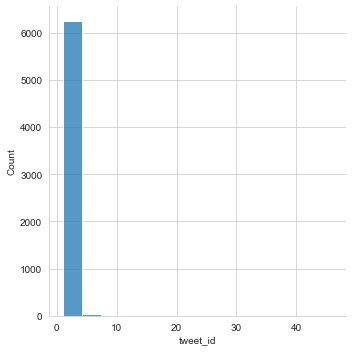

In [151]:
sns.displot(data=df_clean.groupby('user_name')['tweet_id'].count().sort_values(ascending=False))

In [141]:
for tweet in df_clean[df.user_name == 'eufems'].sort_values('likes', ascending=False).head().tweet:
    print(tweet)

Kasalukuyang sitwasyon sa Tropical Hut Panay Avenue branch. Mahaba ang pila kapwa ng dine in at Grab. (Heck nung tinweet ko ito dumami yung nakapila 😂) https://t.co/qoWa2b8nZk
As a Tropical Hut kid (both hamburger and supermarket, where Mama works), I appreciate this Tropical Hut resurgence. Masarap ang burgers nila pramis. Plus, may isang item on the menu that goes 50% less every 7th of the month. Meron din silang Filipino menu &lt;3 https://t.co/mKgB6mJvqX
Resibo #SarapNaBabalikBalikan #TropicalHut https://t.co/LVKeO2Zstb
Ulitin ko lang bilang anak ng Isang dating opisyal ng Tropical Hut Employees Union: Mercury Drug does not own and manage Tropical Hut. Both are owned by *different* members of the Que Family although part of the Mercury Group of Co. Each has a separate management. https://t.co/lQZrHzu2ZI
Nag-enjoy na ba tayo? Damay na natin yung grocery ng Tropical Hut. Trivia: nauna yung grocery kaysa sa hamburger joint 😁 https://t.co/tqFcQ99ukn


In [142]:
for tweet in df_clean[df.user_name == 'robert1001smith'].sort_values('likes', ascending=False).head().tweet:
    print(tweet)

@awesome_drew Pagpasensyahan mo na kunti lng tlga food crew nila sa store -- try it on diff time of the day. Mainit yan ngayon kasi trending sila, sna ma-sustain yung energy ng buyers. #TropicalHut
@b_bukid @dumidyeypee In Pioneer Pasig Tropical hut 🌴🍍 kahit hatinggabe daw maraming diners. https://t.co/KubCVpqQio
@b_bukid @dumidyeypee Habang naghihintay ng nanakawan dpat kumaen sa Tropical Hut. 🍽🔪💗 https://t.co/5nr7fiay5z
@Oragoneh @supernegatrona Sarap nyan Tropical Hut Chicken Spring at yung amoy authentic tlga.
@b_bukid @dumidyeypee LOLs mas dumami yung repapips makaalis na nga. #TropicalHut https://t.co/kQUq0QMWaE


In [145]:
for tweet in df_clean[df.user_name == 'njytolentino'].sort_values('likes', ascending=False).head(5).tweet:
    print(tweet)

To province based twt, maybe wag niyo hintayin ang Tropical Hut, discover your region's underrated fastfood, diner or even burger joint https://t.co/ti8AHJ7JDt
Since localized ang Tropical Hut hype sa Metro Manila and nearby towns, ano ano ang sikat na local fastfood sa inyo? Cindy's is still strong in North and Central Luzon, Biggs in Bicol.

Anong chain ang sikat sa inyo na inyo lang meron?
Never quite imagined na pipila na ako para makaorder sa Tropical Hut today.

Their delivery orders are their lifesavers now tbh especially may access issues sila since limited branches lang sila. https://t.co/hd1K0NhWzm
ngayon lang nakatikim ng tropical hut mga tao? [laughs in Ever Commonwealth, Quezon Memorial, Farmers Cubao and Aurora Cubao] https://t.co/954Z0u7bOO
Wala pa bang magtutweet ng "ako na lang ba ang di nakakain sa Tropical Hut?"


In this section, I looked at the biggest accounts that joined the trend. 4 out of the top 5 are "news" accounts and the remaining one is a celebrity. Looking at the statistics, 75% of the users have 715 or less followers.

In [130]:
users = df_clean[['user_name', 'user_display_name', 'user_followers', 'user_following', 'user_created', 'user_tweets_count']].sort_values('user_followers', ascending=False).drop_duplicates('user_name')
users.head()

,user_name,user_display_name,user_followers,user_following,user_created,user_tweets_count
6129,ABSCBNNews,ABS-CBN News,8512173,1063,2008-08-16 18:09:33+08:00,984166
5018,manilabulletin,Manila Bulletin News,1060285,213,2008-07-10 15:55:26+08:00,751841
5242,yaelyraz,Yael Yrastorza Yuzon,387886,1814,2009-04-23 20:05:33+08:00,54779
2496,interaksyon,Interaksyon,213368,106,2011-01-25 19:24:31+08:00,200488
5309,Spotdotph,SPOT.ph,151122,972,2009-03-31 22:10:17+08:00,59972


In [86]:
users.describe()

,user_followers,user_following,user_tweets_count
count,6.307000e+03,6307.000000,6307.000000
mean,2.708149e+03,626.245600,25177.205645
std,1.082399e+05,1020.083411,44249.605342
min,0.000000e+00,0.000000,1.000000
25%,1.090000e+02,183.000000,3516.500000
50%,2.960000e+02,374.000000,12187.000000
75%,7.155000e+02,719.000000,29975.500000
max,8.512173e+06,33678.000000,984166.000000


In [82]:
top_users = users['user_name'].head(10).to_list()
df_clean[df_clean['user_name'].isin(top_users)].sort_values('user_followers', ascending=False)[['tweet', 'user_name', 'likes', 'retweets']].head(10)

,tweet,user_name,likes,retweets
6129,"Why ‘Tropical Hut’ trended on Twitter, inspiri...",ABSCBNNews,1099,181
5018,"Last June 12, 124th Philippine Independence Da...",manilabulletin,31,9
5242,OPM Burger #TropicalHut https://t.co/W3i1JjAuv...,yaelyraz,96,10
5749,What are your fond memories of Tropical Hut? 🍔...,interaksyon,55,12
5447,OPERATING SINCE 1965\n\nThe name “Tropical Hut...,interaksyon,173,41
323,Most of Tropical Hut's stores are located in M...,interaksyon,6,2
45,What are your fond memories of Tropical Hut? 🍔...,interaksyon,10,1
3234,Most of Tropical Hut's stores are located in M...,interaksyon,44,12
2496,Most of Tropical Hut's stores are located in M...,interaksyon,3,2
1112,‘WE VALUE YOUR PATRONAGE.’\n\nTropical Hut Ham...,interaksyon,67,8


## Users' account age

Whenever there's a trend, it is interesting to look at the age of accounts. Looking at the graph below, about 23% of accounts are created after 2020.

Percent of users created 2020 onwards: 0.23925796733787855
Percent of users created 2020 onwards: 0.04899318217853179


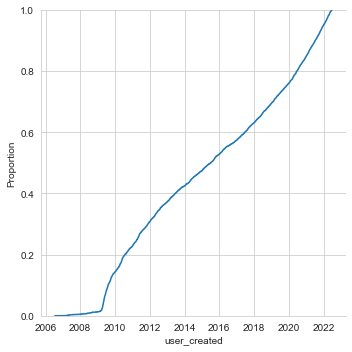

In [114]:
sns.displot(users, x='user_created', kind="ecdf")
print(f'Percent of users created 2020 onwards: {users[users.user_created >= "2020-01-01"].shape[0]/users.shape[0]}')
print(f'Percent of users created 2020 onwards: {users[users.user_created > "2022-01-01"].shape[0]/users.shape[0]}')

We separated the accounts created only during 2022. From this new group, most of the tweets came from their new twitter account. The remaining accounts only tweeted 4 times or less.
We see that 23% of have 100 or less followers but 81% have less than 1000 tweets.

In [150]:
new_users = users[users['user_created'] >= '2022-01-01'].sort_values('user_tweets_count', ascending=False)

new_users_df = df_clean[df_clean.user_name.isin(new_users.user_name.to_list())]
new_users_df.groupby('user_name')['tweet_id'].count().sort_values(ascending=False).head(10)

user_name
THHamburger        11
GManicurist         4
cjdelarosajw        4
mynameisibarra      4
marcf510            3
judleth_ramos       3
carman_steeven      3
user01230219        3
akosinicamatias     3
Philheadlines       3
Name: tweet_id, dtype: int64

Percent of users with 100 or less followers: 0.23529411764705882
Percent of users with 500 or less followers: 0.660377358490566


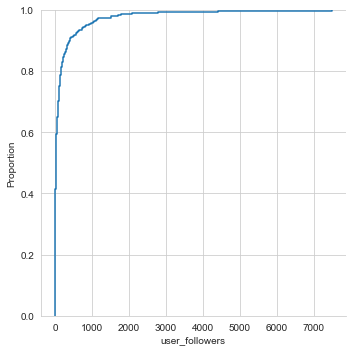

In [146]:
sns.displot(new_users, x='user_followers', kind="ecdf")
print(f'Percent of users with 100 or less followers: {users[users.user_followers <= 100].shape[0]/users.shape[0]}')
print(f'Percent of users with 500 or less followers: {users[users.user_followers <= 500].shape[0]/users.shape[0]}')

Percent of users with 1000 or less tweets: 0.8165530363088632
Percent of users with 5000 or less tweets: 0.9646424607578881


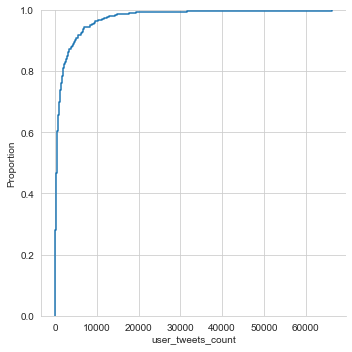

In [125]:
sns.displot(new_users, x='user_tweets_count', kind="ecdf")
print(f'Percent of users with 1000 or less tweets: {users[users.user_followers <= 1000].shape[0]/users.shape[0]}')
print(f'Percent of users with 5000 or less tweets: {users[users.user_followers <= 5000].shape[0]/users.shape[0]}')

The most prolific new account is @HoranyTaban which seem to be a "news" account about technology. The others seem to be ordinary accounts of people or "stan accounts" for various groups.

In [129]:
top_new_users = new_users['user_name'].head(10).to_list()
df_clean[df_clean['user_name'].isin(top_new_users)].sort_values('user_tweets_count', ascending=False)[['tweet', 'user_name', 'likes', 'retweets']].head(10)

,tweet,user_name,likes,retweets
5707,Why Tropical Hut is being talked about on loca...,HoranyTaban,0,0
7784,tropical hut cheese burger &gt;&gt;&gt;&gt;,gojologyy,0,0
2549,gusto ko rin try tropical hut it’s so nice na ...,pickhye,0,0
3604,"@acenyxyoboi @bgyo_ph As far as i know, may hi...",Hi_BGYO,1,2
6715,@dettesteffens22 @supernegatrona Support tropi...,ParadisePalawan,0,0
1055,what's with tropical hut? anong meron? hahah,purplejaechan,0,0
6318,"dahil s twitter, mapuntahan nga rin ang tropic...",PaoPaoPawikan,1,0
4207,yes omg tropical hut burgers are the best http...,choihaulz,2,0
2609,"tropical hut in vito cruz, you are missed http...",yoonkimingenius,0,0
32,@japtobias Bukod sa tropical hut pede idagdag ...,StarrAsuncion06,0,0


From the above analysis, it seems like the trend is pretty organic. If it trends again in the future, I might scrape more data and look at it again.